# Test Types
In this visuals we want to discorer the following

* Visualize what test types are being used the most.
* Visualize what test types give the most issues(blast and linter)

importing libararies

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [176]:
read_linting_results = pd.read_csv('data/blast_linting_results.csv')
read_review_test_results = pd.read_csv('data/blast_review_test_results.csv')
read_reviews = pd.read_csv('data/blast_reviews.csv')
data_tests = pd.read_csv('data/blast_tests.csv')
read_code_blast_tests = pd.read_csv('data/code_blast_tests.csv')
read_exercises = pd.read_csv('data/exercises.csv')
data_implementation_exercise = pd.read_csv('data/implementation_exercise.csv')

# Cleaned data

In [177]:
data_linting_result_warning= read_linting_results[['blast_review_id', 'file_name', 'message', 'type', 'line', 'column']]
data_linting_result = data_linting_result_warning[data_linting_result_warning['type'].str.lower().isin(['error'])]

data_review_test_results = read_review_test_results[['blast_review_id', 'test_id', 'human_error_message', 'test_language']]

data_reviews = read_reviews[['id', 'implementation_id', 'state', 'created_on']]

data_exercises = read_exercises[['id', 'title', 'files_to_turn_in']]

data_code_blast_tests = read_code_blast_tests[['id', 'exercise_id', 'title', 'test_type', 'created_on', 'language']]

In [178]:
data_linting_result

,blast_review_id,file_name,message,type,line,column
0,48994f15-1b24-11ea-ab6c-cec41367f4e7,/wisselgeld.php,There must be a single space between the closi...,ERROR,13,18
1,902b5ef6-1b24-11ea-ab6c-cec41367f4e7,/tijd.php,There must be a single space between the closi...,ERROR,2,27
2,a210c4d7-1b24-11ea-ab6c-cec41367f4e7,/wisselgeld.php,There must be a single space between the closi...,ERROR,14,18
3,bc8d258f-1b2a-11ea-ab6c-cec41367f4e7,/cart.php,"Line indented incorrectly; expected 8 spaces, ...",ERROR,27,1
4,bc8d258f-1b2a-11ea-ab6c-cec41367f4e7,/cart.php,There must be a single space between the closi...,ERROR,27,29
...,...,...,...,...,...,...
1341110,018b13fb-9943-713d-af34-408ecb7d36bd,/piramide.php,Blank line found at start of control structure,ERROR,6,40
1341112,018b13fc-d76d-7bad-b1c0-ee4877a154ee,/piramide.php,Blank line found at start of control structure,ERROR,6,40
1341113,018b13fd-4df2-7761-94b4-bd22977d2f65,/calculator.php,Header blocks must be separated by a single bl...,ERROR,1,1
1341114,018b13fd-4df2-7761-94b4-bd22977d2f65,/tempCodeRunnerFile.php,Header blocks must be separated by a single bl...,ERROR,1,1


In [179]:
data_review_test_results

,blast_review_id,test_id,human_error_message,test_language
0,00001c9e-f8a5-4b92-8c94-b02f2209c968,156effcd-27f9-11ec-abc5-4213e7ee7fac,Je gebruikt echt `DELETE` in je SQL bestand,nl
1,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
2,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
3,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
4,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
...,...,...,...,...
2227019,ffffed58-5f58-4404-ada4-60492cf25614,3333dedb-afd7-11ea-a2fb-cec41367f4e7,Deze test controleert of jouw programma de str...,nl
2227020,ffffed58-5f58-4404-ada4-60492cf25614,3333dedb-afd7-11ea-a2fb-cec41367f4e7,NaN,nl
2227021,fffff2c9-1435-4a91-891f-047d83e194a9,0df303b2-ae4e-11eb-b248-4213e7ee7fac,NaN,nl
2227022,fffff2c9-1435-4a91-891f-047d83e194a9,601602ce-ae4d-11eb-b248-4213e7ee7fac,NaN,nl


Counting the tests

In [180]:
unique_counts = data_tests["test_type"].value_counts()
unique_counts

PHP_UNIT    410
PYTHON       99
NODE_JS      57
C_SHARP       1
Name: test_type, dtype: int64

How many issues are there?

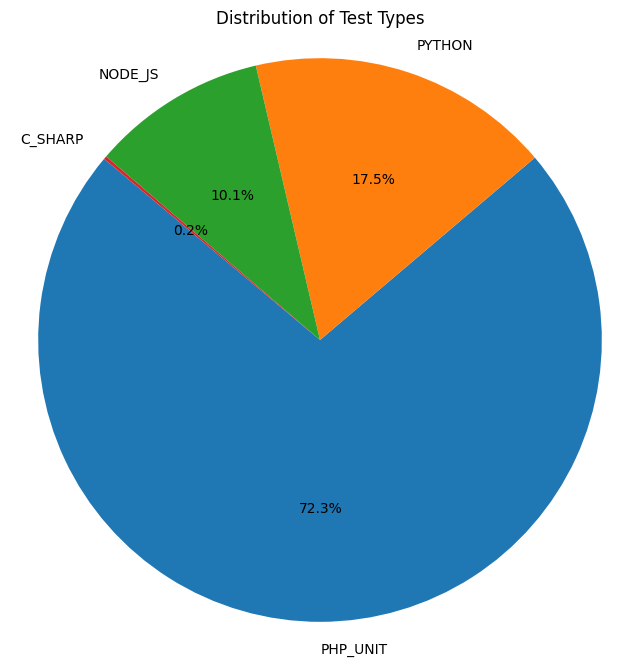

In [181]:
# Assuming you have already calculated unique_counts using value_counts()
unique_counts = data_tests["test_type"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Test Types")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


This data is unclear, php is sorted into multiple languages. Because of linting issues, lets find out what the real issues are.

Finding the unique blast values

In [182]:
# Extracting language names from 'file_name' and counting occurrences
language_counts_blast = data_review_test_results['blast_review_id'].count()

# Displaying counts of each language
language_counts_blast


2227024

Kijk naar de structuur van de blast errors, ze zullen de zelfde structuur hebben als het gaat om linting of echt een opdracht

Visualize what test types give the most issues(blast and linter)

Finding the unique linting values

In [183]:
# Extracting language names from 'file_name' and counting occurrences
language_counts_linting = data_linting_result['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

# Displaying counts of each language
print(language_counts_linting)


php     486192
html    326956
js      251930
css      98299
sql      78774
py        3669
htm       3231
inc          5
Name: 0, dtype: int64


Making the visual more specific by sepporate the linting and blast issues, here are the linting issues;

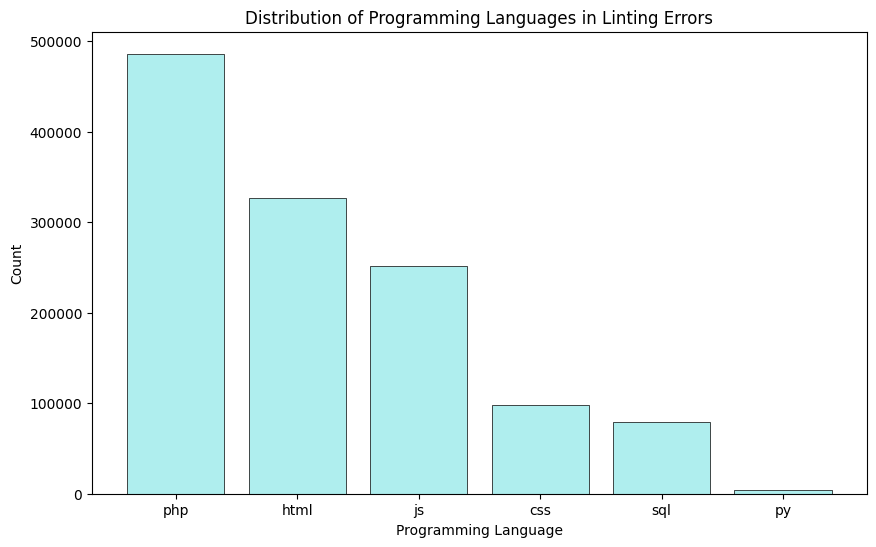

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already extracted language names and counts using the regex approach
language_counts = data_linting_result['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

# Filter the dataset for different language types
languages_to_plot = ['php', 'html', 'sql', 'js', 'css', 'py']
filtered_counts = language_counts[language_counts.index.isin(languages_to_plot)]

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(filtered_counts.index, filtered_counts, color='paleturquoise', edgecolor='black', linewidth=0.5)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Distribution of Programming Languages in Linting Errors')
plt.show()


In [185]:
file_type_with_blast_review = data_linting_result[['blast_review_id', 'test_id']].set_index('test_id')
joined_data_blast_linting = data_review_test_results.set_index('blast_review_id').join(file_type_with_blast_review)

KeyError: "['test_id'] not in index"

In [ ]:
file_type_with_blast_review

,file_name
blast_review_id,
48994f15-1b24-11ea-ab6c-cec41367f4e7,/wisselgeld.php
902b5ef6-1b24-11ea-ab6c-cec41367f4e7,/tijd.php
a210c4d7-1b24-11ea-ab6c-cec41367f4e7,/wisselgeld.php
bc8d258f-1b2a-11ea-ab6c-cec41367f4e7,/cart.php
bc8d258f-1b2a-11ea-ab6c-cec41367f4e7,/cart.php
...,...
018b13fb-9943-713d-af34-408ecb7d36bd,/piramide.php
018b13fc-d76d-7bad-b1c0-ee4877a154ee,/piramide.php
018b13fd-4df2-7761-94b4-bd22977d2f65,/calculator.php


In [ ]:
joined_data_blast_linting_language = joined_data_blast_linting['test_id'].str.extract(r'\.(\w+)$').loc[:, 0].dropna()
joined_data_blast_linting_language

Series([], Name: 0, dtype: object)

Making the visual more specific by sepporate the linting and blast issues, here are the blast issues;

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming joined_data_blast_linting_language is a Series containing the programming languages
# and you have already dropped NaN values
joined_data_blast_linting_language = joined_data_blast_linting['test_type'].dropna()

# Count the occurrences of each programming language
language_counts = joined_data_blast_linting_language.value_counts()

# Filter the dataset for specific language types
languages_to_plot = ['php', 'html', 'sql', 'js', 'css', 'py']
filtered_counts = language_counts[language_counts.index.isin(languages_to_plot)]

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(filtered_counts.index, filtered_counts, color='paleturquoise', edgecolor='black', linewidth=0.5)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Distribution of Programming Languages in Blast Errors')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


KeyError: 'test_type'